In [11]:
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  

# 3.	Xử lý dữ liệu và trực quan hóa : (4 điểm)

cau 1

In [3]:

data = pd.read_csv('customer_shopping_data.csv')  
print( data.shape)  
display(data.head())  
display(data.tail())  
data.info()  
display(data.describe()) 

(99457, 10)


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


Câu 2: Kiểm tra dữ liệu bị null

In [4]:
missing_values = data.isnull().sum()  
print(missing_values)  

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


Câu 3:

In [6]:
data['invoice_date'] = pd.to_datetime(data['invoice_date'], dayfirst=True)  
print(data.dtypes)  

invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
dtype: object


cau 4

In [7]:
data['month'] = data['invoice_date'].dt.month  
display(data[['invoice_date', 'month']].head())  

,invoice_date,month
0,2022-08-05,8
1,2021-12-12,12
2,2021-11-09,11
3,2021-05-16,5
4,2021-10-24,10


In [8]:
data['month_name'] = data['invoice_date'].dt.month_name()  

display(data[['invoice_date', 'month_name']].head())  

,invoice_date,month_name
0,2022-08-05,August
1,2021-12-12,December
2,2021-11-09,November
3,2021-05-16,May
4,2021-10-24,October


cau 6

In [9]:
data['revenue'] = data['quantity'] * data['price']  

display(data[['quantity', 'price', 'revenue']].head())  

,quantity,price,revenue
0,5,1500.40,7502.00
1,3,1800.51,5401.53
2,1,300.08,300.08
3,5,3000.85,15004.25
4,4,60.60,242.40


cau 7

In [15]:

data['invoice_date'] = pd.to_datetime(data['invoice_date'], dayfirst=True)  
data['revenue'] = data['quantity'] * data['price']  


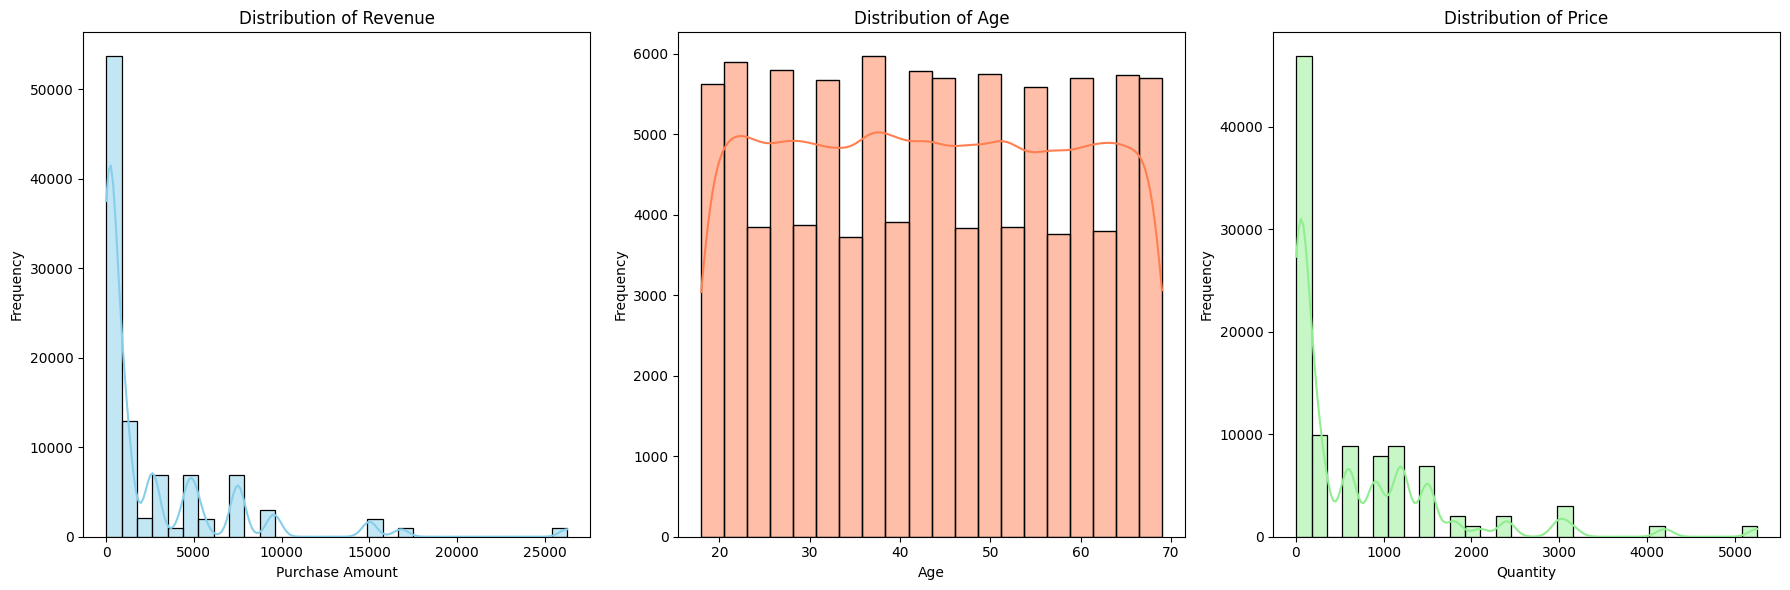

In [16]:

plt.figure(figsize=(18, 6))  

plt.subplot(1, 3, 1)  
sns.histplot(data['revenue'], bins=30, kde=True, color='skyblue')  
plt.title('Distribution of Revenue')  
plt.xlabel('Purchase Amount')  
plt.ylabel('Frequency')  

plt.subplot(1, 3, 2)  
sns.histplot(data['age'], bins=20, kde=True, color='coral')  
plt.title('Distribution of Age')  
plt.xlabel('Age')  
plt.ylabel('Frequency')  

plt.subplot(1, 3, 3)  
sns.histplot(data['price'], bins=30, kde=True, color='lightgreen')  
plt.title('Distribution of Price')  
plt.xlabel('Quantity')  
plt.ylabel('Frequency')  

plt.tight_layout()  
plt.show()  

cau8

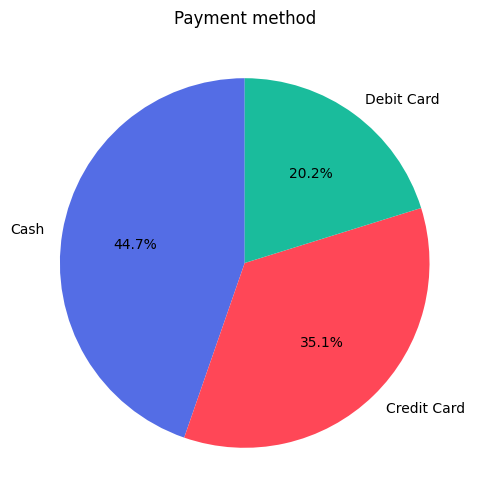

In [17]:
payment_counts = data['payment_method'].value_counts()  
payment_labels = payment_counts.index  
payment_sizes = payment_counts.values  

plt.figure(figsize=(8, 6))  
plt.pie(payment_sizes, labels=payment_labels, autopct='%1.1f%%', colors=['#546de5', '#ff4757', '#1abc9c'], startangle=90)  
plt.title('Payment method')  
plt.show()  

cau 9

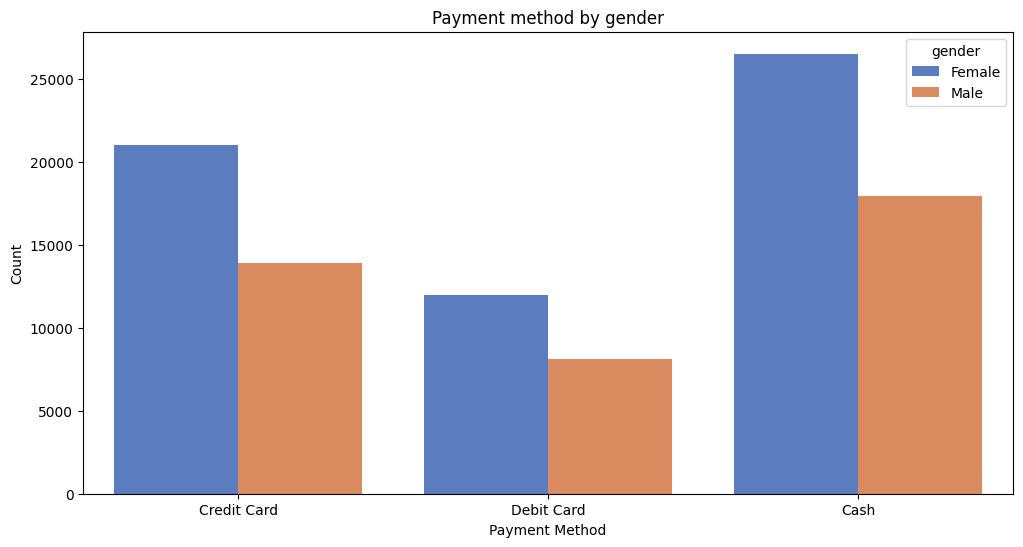

In [18]:
plt.figure(figsize=(12, 6))  
sns.countplot(data=data, x='payment_method', hue='gender', palette='muted')  
plt.title('Payment method by gender')  
plt.xlabel('Payment Method')  
plt.ylabel('Count')  
plt.show()  

cau 10

In [19]:
data['month'] = data['invoice_date'].dt.month_name()  


In [20]:

monthly_revenue = data.groupby('month')['revenue'].sum().reindex(  
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']  
)  


C:\Users\MSI\AppData\Local\Temp\ipykernel_23304\4044957625.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette='hsv')


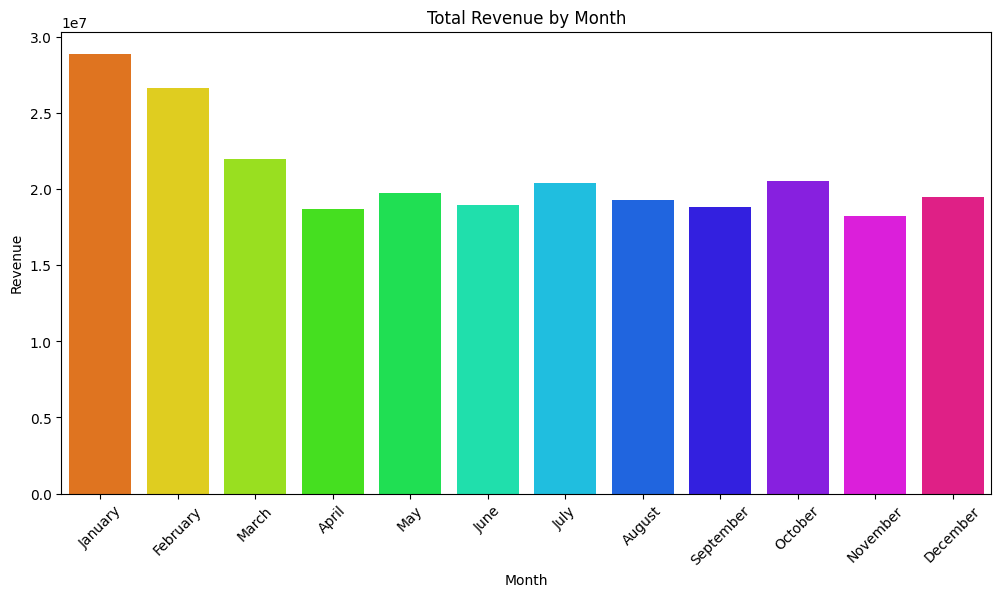

In [21]:

plt.figure(figsize=(12, 6))  
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette='hsv')  
plt.title('Total Revenue by Month')  
plt.xlabel('Month')  
plt.ylabel('Revenue')  
plt.xticks(rotation=45)  
plt.show() 

cau11

In [23]:
import plotly.express as px  


In [25]:

category_gender_revenue = data.groupby(['category', 'gender'])['revenue'].sum().unstack()  

category_gender_revenue = data.groupby(['category', 'gender'])['revenue'].sum().reset_index()  
fig = px.treemap(category_gender_revenue, path=['category', 'gender'], values='revenue', color='category',  
                 color_discrete_map={'Clothing': 'blue', 'Shoes': 'red', 'Technology': 'green',  
                                     'Cosmetics': 'purple', 'Toys': 'orange', 'Books': 'pink', 'Souvenir': 'yellow'})  
fig.update_layout(title_text='Total revenue according to category and gender')  
fig.show()  

cau12

In [28]:
store_revenue = data.groupby('shopping_mall')['revenue'].sum().sort_values(ascending=False)  

top5_stores = store_revenue.head(5)  


NameError: name 'fontprop' is not defined

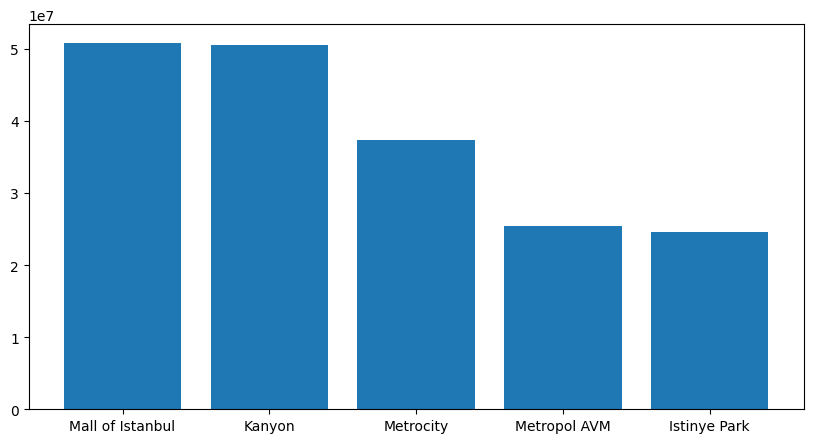

In [29]:


plt.figure(figsize=(10, 5))  
plt.bar(top5_stores.index, top5_stores.values)  
plt.xlabel('Tên cửa hàng', fontproperties=fontprop)  
plt.ylabel('Tổng doanh thu', fontproperties=fontprop)  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  